In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from sklearn.base import OneToOneFeatureMixin
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('./data/preprocess_dataset/dataset_multi-class.csv')
del data['Unnamed: 0']
data = data[data['labels'] != "sheet"]
data = data[data['labels'] != "ribbon"]
data = data[data['labels'] != "tube"]

categories = data["labels"].astype("category").cat
data["labels"] = categories.codes
x = data.iloc[:, :-1]
y = data.iloc[:, -1]
scaler = MinMaxScaler() 

X = scaler.fit_transform(x)

In [3]:
col = data.columns[:-1]
print(col)
X=pd.DataFrame(X,columns=col)
data=pd.concat([X,y],axis=1)

Index(['ABC', 'ABCGG', 'nAcid', 'nBase', 'SpAbs_A', 'SpMax_A', 'SpDiam_A',
       'SpAD_A', 'SpMAD_A', 'LogEE_A',
       ...
       'SRW10', 'TSRW10', 'MW', 'AMW', 'WPath', 'WPol', 'Zagreb1', 'Zagreb2',
       'mZagreb1', 'mZagreb2'],
      dtype='object', length=1010)


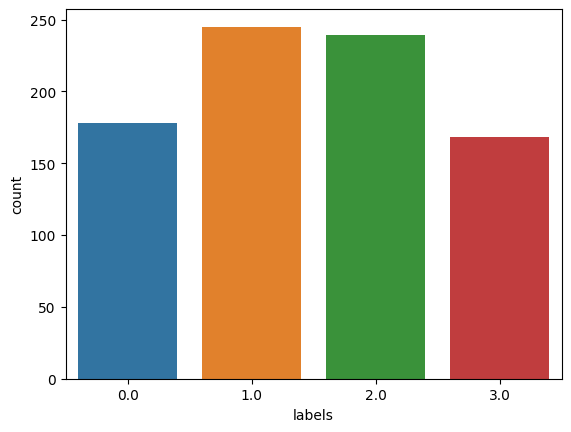

In [4]:
ax = sns.countplot(x='labels',data=data)

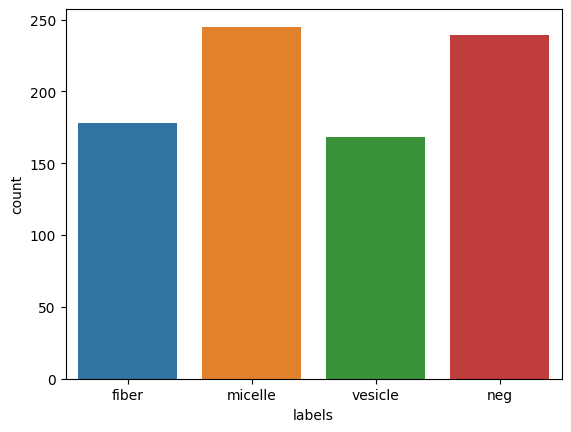

In [5]:
data=pd.read_csv('./data/preprocess_dataset/dataset_multi-class.csv')
del data['Unnamed: 0']
data = data[data['labels'] != "sheet"]
data = data[data['labels'] != "ribbon"]
data = data[data['labels'] != "tube"]
ax = sns.countplot(x='labels',data=data) 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=2)
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

X_train=pd.DataFrame(X_train,columns=col)
data1=pd.concat([X_train,y_train],axis=1)

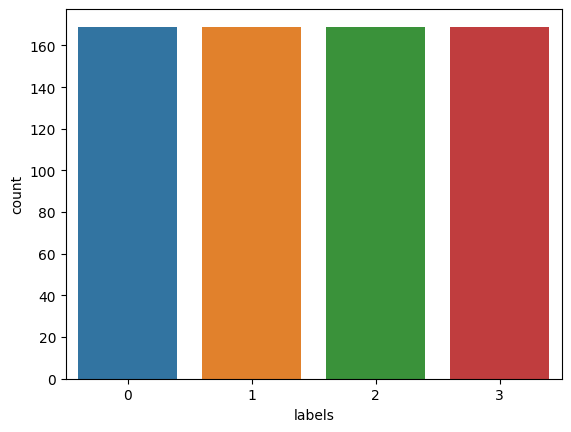

In [7]:
ax = sns.countplot(x='labels',data=data1)    

In [8]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='rbf', C=1000.0, gamma=0.1, random_state=0)
clf = clf.fit(X_train,y_train)

Confusion Matrix:
[[31 13  3  4]
 [17 43  5 11]
 [ 1  6 56  7]
 [ 6 13 10 23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.61      0.58        51
           1       0.57      0.57      0.57        76
           2       0.76      0.80      0.78        70
           3       0.51      0.44      0.47        52

    accuracy                           0.61       249
   macro avg       0.60      0.60      0.60       249
weighted avg       0.61      0.61      0.61       249

Accuracy: 0.6144578313253012


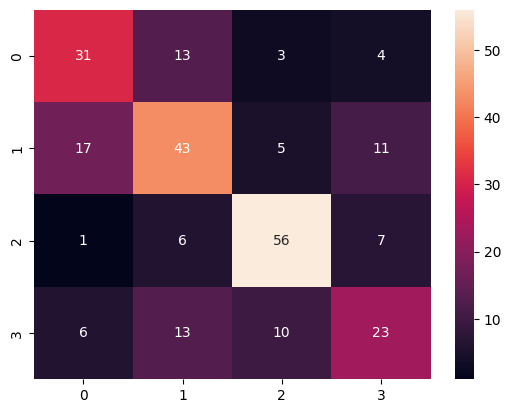

In [9]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)


result = confusion_matrix(y_test, y_test_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[37  7  1  6]
 [14 47  4 11]
 [ 3  4 59  4]
 [ 7 11  6 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.73      0.66        51
           1       0.68      0.62      0.65        76
           2       0.84      0.84      0.84        70
           3       0.57      0.54      0.55        52

    accuracy                           0.69       249
   macro avg       0.68      0.68      0.68       249
weighted avg       0.69      0.69      0.69       249

Accuracy: 0.6867469879518072


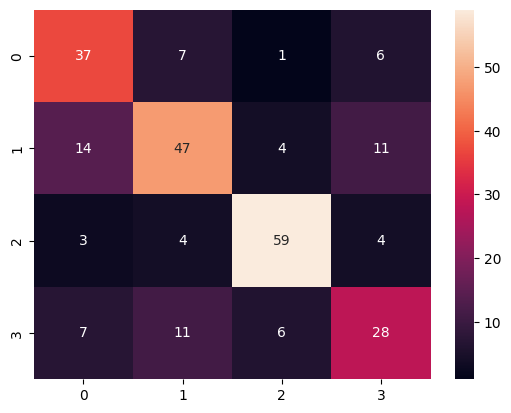

In [10]:
# RandomForest
forest = RandomForestClassifier(n_estimators = 10, random_state=0)      
forest = forest.fit(X_train,y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

result = confusion_matrix(y_test, y_test_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

In [11]:
#importances = forest.feature_importances_
#indices = importances.argsort()[::-1][:20]
#np.savetxt('importaces.txt',importances[indices],fmt='%f',delimiter=',')

In [12]:
#col[indices]

Index(['IC5', 'MIC2', 'MIC3', 'VR1_Dzpe', 'MATS7Z', 'SlogP_VSA2', 'ATS8s',
       'TpiPC10', 'SIC4', 'Xp-0d', 'VE1_Dzare', 'MID_C', 'AATS8are', 'ATSC0d',
       'ZMIC0', 'ETA_eta_FL', 'VE1_Dzpe', 'ATS0Z', 'TSRW10', 'VE3_Dzi'],
      dtype='object')

Confusion Matrix:
[[34  9  1  7]
 [11 53  4  8]
 [ 0  5 55 10]
 [ 4 12 12 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        51
           1       0.67      0.70      0.68        76
           2       0.76      0.79      0.77        70
           3       0.49      0.46      0.48        52

    accuracy                           0.67       249
   macro avg       0.65      0.65      0.65       249
weighted avg       0.66      0.67      0.67       249

Accuracy: 0.6666666666666666


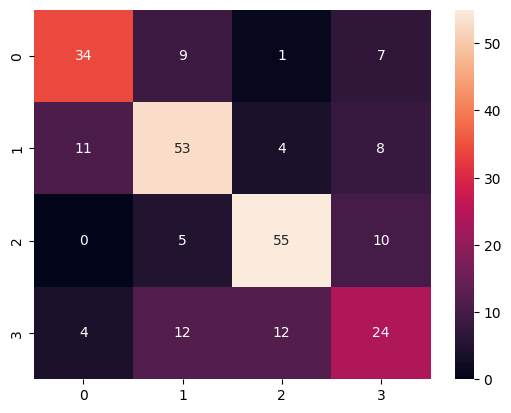

In [13]:
from xgboost import XGBClassifier

clf2 = XGBClassifier(
    max_depth=2,
    gamma=2,
    eta=0.8,
    reg_alpha=0.5,
    reg_lambda=0.5, random_state=0
)
clf2 = clf2.fit(X_train,y_train)
y_train_pred = clf2.predict(X_train)
y_test_pred = clf2.predict(X_test)


result = confusion_matrix(y_test, y_test_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

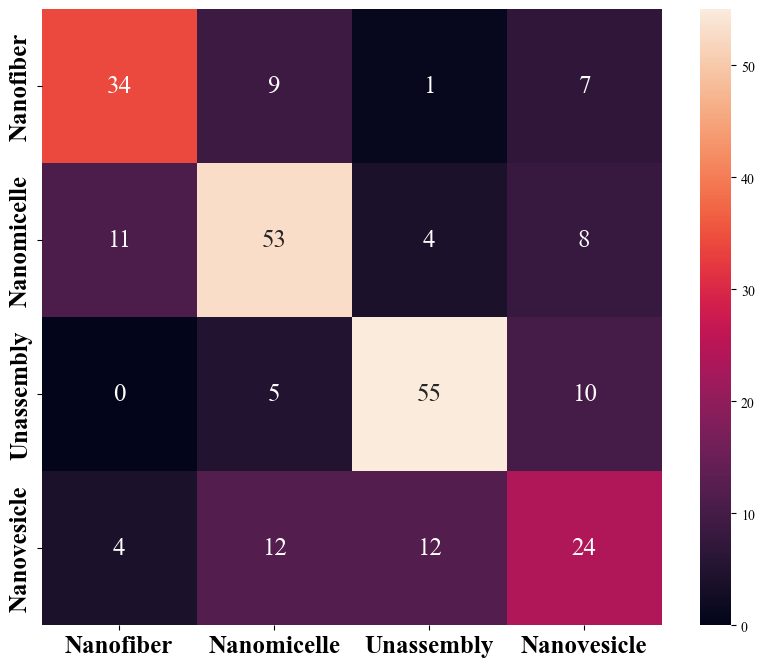

In [14]:
y_train_pred = clf2.predict(X_train)
y_test_pred = clf2.predict(X_test)


result = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10,8))
df_cm = pd.DataFrame(result, index = ['Nanofiber', 'Nanomicelle', 'Unassembly','Nanovesicle'],
                  columns = ['Nanofiber', 'Nanomicelle', 'Unassembly','Nanovesicle'])
sns.heatmap(df_cm,annot=True,annot_kws={"size": 18}, fmt="d")
plt.rcParams["font.weight"] = "bold"


plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.xticks(fontproperties='Times New Roman', size=18)
plt.yticks(fontproperties='Times New Roman', size=18)
#plt.savefig('confusion_matrix.tif', dpi=300)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

MLP= MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(2000,50), random_state=0) 
MLP.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(2000, 50), random_state=0,
              solver='sgd')

Confusion Matrix:
[[39  2  2  8]
 [14 39  9 14]
 [ 0 15 35 20]
 [ 4  8 15 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.76      0.72        51
           1       0.61      0.51      0.56        76
           2       0.57      0.50      0.53        70
           3       0.37      0.48      0.42        52

    accuracy                           0.55       249
   macro avg       0.56      0.56      0.56       249
weighted avg       0.57      0.55      0.56       249

Accuracy: 0.5542168674698795


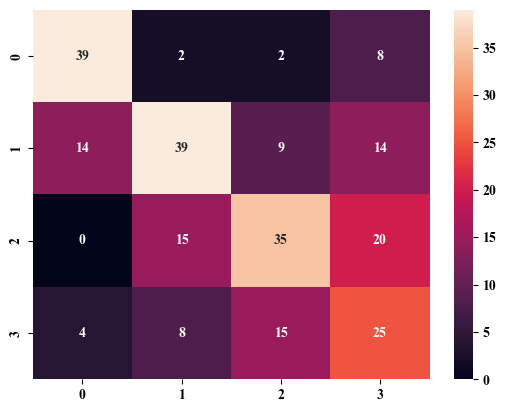

In [16]:
y_train_pred = MLP.predict(X_train)
y_test_pred = MLP.predict(X_test)

result = confusion_matrix(y_test, y_test_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[32  9  2  8]
 [12 51  5  8]
 [ 1  7 56  6]
 [ 2 10 10 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.63      0.65        51
           1       0.66      0.67      0.67        76
           2       0.77      0.80      0.78        70
           3       0.58      0.58      0.58        52

    accuracy                           0.68       249
   macro avg       0.67      0.67      0.67       249
weighted avg       0.68      0.68      0.68       249

Accuracy: 0.678714859437751


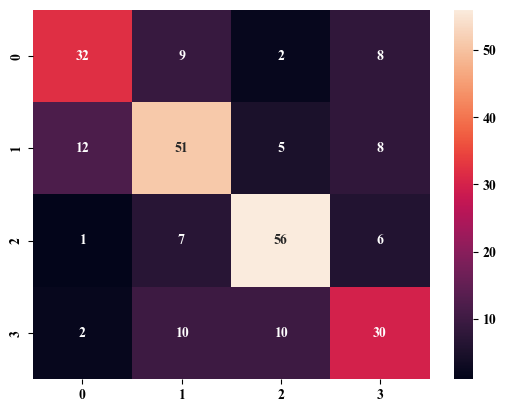

In [17]:
#GBDT
from sklearn.ensemble import GradientBoostingClassifier
clf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
         max_depth=1, random_state=0).fit(X_train, y_train)
y_train_pred = clf3.predict(X_train)
y_test_pred = clf3.predict(X_test)

result = confusion_matrix(y_test, y_test_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

In [18]:
# select 20 features 
k_best = SelectKBest(chi2,k=20).fit(X_train, y_train)
#k_best

selected = k_best.get_support()
selected_features= [col[i] for i, s in enumerate(selected) if s]
scores = [k_best.scores_[i] for i, s in enumerate(selected) if s]

df = pd.DataFrame({'feature': selected_features, 'score': scores})
df = df.sort_values('score', ascending=False)

print(df)

       feature       score
0     BCUTd-1l  102.340928
4    BCUTse-1l   89.707023
5    BCUTpe-1l   89.620574
6   BCUTare-1l   88.059647
1     BCUTZ-1l   84.513639
2     BCUTm-1l   81.852242
3     BCUTv-1l   66.636791
7     BCUTp-1l   49.982560
8     BalabanJ   30.160594
10     MINdssC   19.207935
15        CIC5   17.311166
11         IC1   16.610741
17        MIC2   16.272435
12         IC2   15.885137
18        MIC3   14.980287
9         RPCG   13.706309
16        MIC1   13.378001
13         IC3   13.320045
14        CIC4   13.259977
19        MIC4   13.059230


Accuracy is:  0.6626506024096386
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.75      0.69        51
           1       0.65      0.67      0.66        76
           2       0.79      0.81      0.80        70
           3       0.47      0.37      0.41        52

    accuracy                           0.66       249
   macro avg       0.64      0.65      0.64       249
weighted avg       0.65      0.66      0.66       249



<AxesSubplot:>

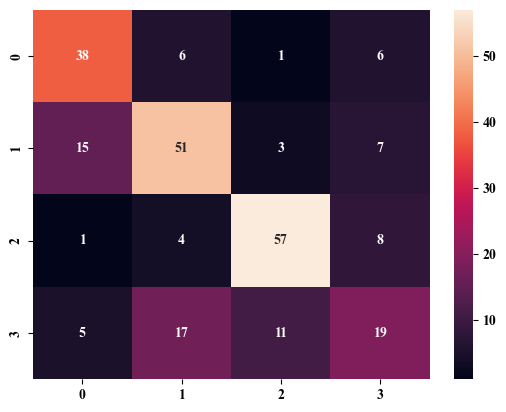

In [19]:
X_2_train=X_train[selected_features]
X_2_test=X_test[selected_features]

clf_rf_2 = RandomForestClassifier(n_estimators = 10, random_state=0)      
clr_rf_2 = clf_rf_2.fit(X_2_train,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(X_2_test))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(X_2_test))

result1 = classification_report(y_test, clf_rf_2.predict(X_2_test))
print("Classification Report:",)
print (result1)
sns.heatmap(cm_2,annot=True,fmt="d")

In [ ]:
#rfe randomforest
from sklearn.feature_selection import RFE

clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=20, step=1)
rfe = rfe.fit(X_train, y_train)

In [ ]:
y_train_pred = rfe.predict(X_train)
y_test_pred = rfe.predict(X_test)

cm_2 = confusion_matrix(y_test,rfe.predict(X_test))
sns.heatmap(cm_2,annot=True,fmt="d")

result1 = classification_report(y_test, rfe.predict(X_test))
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,rfe.predict(X_test))
print("Accuracy:",result2)

In [ ]:
#rfecv for randomforest
from sklearn.feature_selection import RFECV

clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5 cross valid
rfecv = rfecv.fit(X_train, y_train)


In [ ]:
y_train_pred = rfecv.predict(X_train)
y_test_pred = rfecv.predict(X_test)

result = confusion_matrix(y_test, y_test_pred)
sns.heatmap(result,annot=True,fmt="d")
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

#ACC
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

In [ ]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', pd.DataFrame(X_train).columns[rfecv.support_])

In [ ]:
rfecv.get_feature_names_out(col)

In [ ]:

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) -900), rfecv.cv_results_['mean_test_score'][:109])
plt.show()

In [ ]:


fig = plt.figure(figsize=(8, 6))
plt.xticks(fontproperties='Times New Roman', size=18)
plt.yticks(fontproperties='Times New Roman', size=18)
line_width = 3  
font2 = {'family' : 'Times New Roman','weight' : 'normal','size' : 22,}
font3 = {'family' : 'Times New Roman','weight' : 'normal','size' : 13,}
plt.xlabel("Number of features selected",font2)
plt.ylabel("Cross validation score (accuracy)",font2)
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) -909), rfecv.cv_results_['mean_test_score'][:100], lw=line_width)

x_max=72
y_max=rfecv.cv_results_['mean_test_score'][71]

plt.plot(x_max,y_max, 'ro')

plt.axvline(x=x_max, linestyle='-.', color='grey')
#plt.savefig('rfecv_duo.tif', dpi=300)
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
forest.fit(X_train, y_train)

gbdt_pred = clf3.predict(X_test)
xgb_pred = clf2.predict(X_test)
rf_pred = forest.predict(X_test)

ensemble_matrix = np.column_stack((gbdt_pred, xgb_pred, rf_pred))

lr_model = LogisticRegression()
lr_model.fit(ensemble_matrix, y_test)  


final_pred = lr_model.predict(ensemble_matrix)


accuracy = accuracy_score(y_test, final_pred)
print(f'Accuracy: {accuracy}')